### Shows ridge and lasso regression to overcome the problem of overfitting in regression problems 

In [70]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns

In [71]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [72]:
from sklearn.datasets import load_boston

In [73]:
df = load_boston()

C:\Users\daksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [74]:
# Let's check the df

df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

So, here we have array of data , target and feature names

In [75]:
# Let's make dataframe out of this data

data = pd.DataFrame(df.data,columns = df.feature_names)

In [76]:
# Let's check the head of the dataframe

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Here price column is missing in our dataset. Let's add it

In [77]:
data['PRICE'] = df.target

In [78]:
# Let's separate feature variables and target variable

X = data.drop('PRICE',axis = 1)
Y = data['PRICE']

In [79]:
# Let's check out the shape of our dataframe

data.shape

(506, 14)

So our data is having 506 rows and 14 columns

In [93]:
# Let's spit the data into train and test set



X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 129)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(379, 13)
(127, 13)
(379,)
(127,)


## Ridge Regression

In [96]:


ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [97]:
# Let's check out the best parameter and the score

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-21.97095586036698


## Lasso Regression

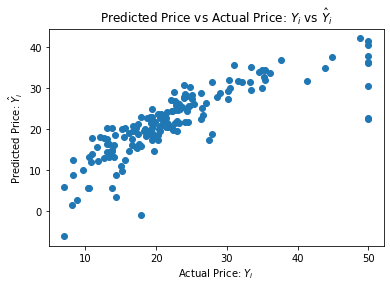

In [102]:
ls = Lasso(alpha=0.1) #a higher value of alpha restricts the coefficients further
ls.fit(X_train,Y_train)
Y_pred_train = ls.predict(X_train) #predictions on training data
Y_pred = ls.predict(X_test) #predictions on testing data
# We plot predicted Y (y-axis) against actual Y (x-axis). Perfect predictions will lie on the diagonal. We see the diagonal trend, suggesting a 'good' fit
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [107]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error: on training data: ',mean_squared_error(Y_train,Y_pred_train), '| And on Testing data',mean_squared_error(Y_test,Y_pred))
print('R-Squared Error: on training data: ',r2_score(Y_train,Y_pred_train), '| And on Testing data',r2_score(Y_test,Y_pred))

Mean Squared Error: on training data:  20.07862315273765 | And on Testing data 30.653771741798355
R-Squared Error: on training data:  0.7484704833754667 | And on Testing data 0.6730050098150877


In [103]:
# Let's check out the best parameter and best score

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-21.974781612839937


In [104]:
#Let's make prediction

prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [105]:


sns.displot(y_test-prediction_lasso)

ValueError: operands could not be broadcast together with shapes (127,) (167,) 

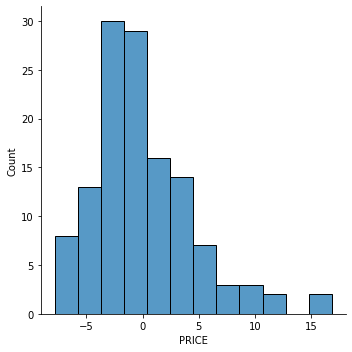

In [ ]:


sns.displot(y_test-prediction_ridge)

Linear Regression Model and Evaluation

In [ ]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Value of y intercept
lm.intercept_

39.511690270043474

In [ ]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.13372
1,ZN,0.046742
2,INDUS,0.09543
3,CHAS,2.342024
4,NOX,-20.204254
5,RM,3.605324
6,AGE,0.004488
7,DIS,-1.436017
8,RAD,0.377171
9,TAX,-0.013795


Model Evaluation

In [ ]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [ ]:
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7315870121710264
Adjusted R^2: 0.7220270975360219
MAE: 3.31215235058224
MSE: 22.759887403209238
RMSE: 4.7707323759784765


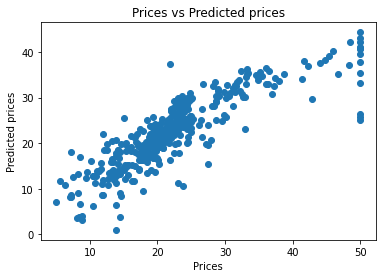

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

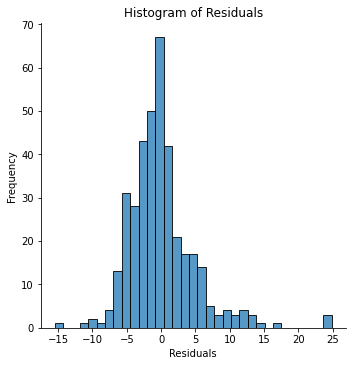

In [ ]:
# Checking Normality of errors
sns.displot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

For Test data


In [ ]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [ ]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7570917553369894
Adjusted R^2: 0.7291465590483244
MAE: 3.4004938337690773
MSE: 20.173001854300825
RMSE: 4.491436502312019
